In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import pearsonr

In [2]:
df = pd.read_csv('data/full_corrected_w_age.csv')
df = df.drop('id', axis=1)

In [3]:
BASE = df.corr()
CORR = df.corr(method=lambda x, y: pearsonr(x, y)[0]) 
PVALUES = df.corr(method=lambda x, y: pearsonr(x, y)[1]) - np.eye(len(df.columns))

c:\Users\edsto\miniconda3\envs\NN\Lib\site-packages\scipy\stats\_stats_py.py:4781: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))


# Statistically significant

### p >= 0.95 & p <= 0.05

In [4]:
corr = CORR['Age'].drop('Age')
pvalues_high = PVALUES[np.abs(PVALUES['Age']) >= 0.95]['Age']
pvalues_low = PVALUES[np.abs(PVALUES['Age']) <= 0.05]['Age']
pvalues = pvalues_high.append(pvalues_low).drop('Age').sort_values()

C:\Users\edsto\AppData\Local\Temp\ipykernel_74928\541854131.py:4: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pvalues = pvalues_high.append(pvalues_low).drop('Age').sort_values()


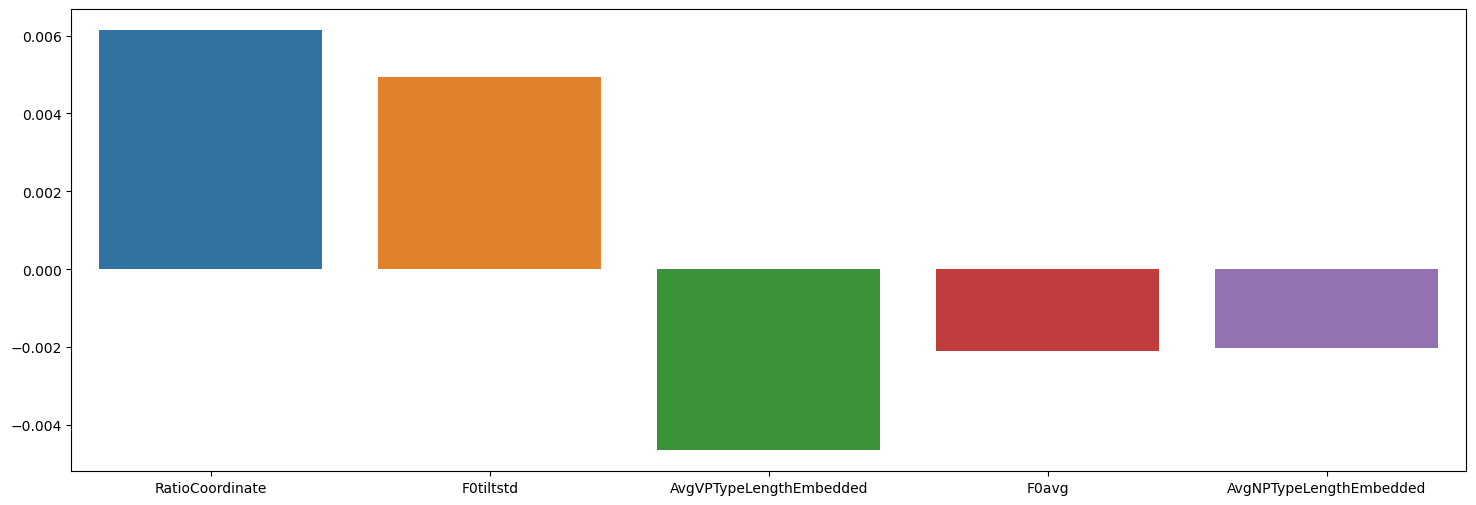

In [5]:
pvalues_high = pvalues_high.sort_values()
plt.figure(figsize=(18,6))
sns.barplot(y=corr[pvalues_high.index.to_list()].values, x=corr[pvalues_high.index.to_list()].index)
#plt.xticks(rotation=90)
plt.show()

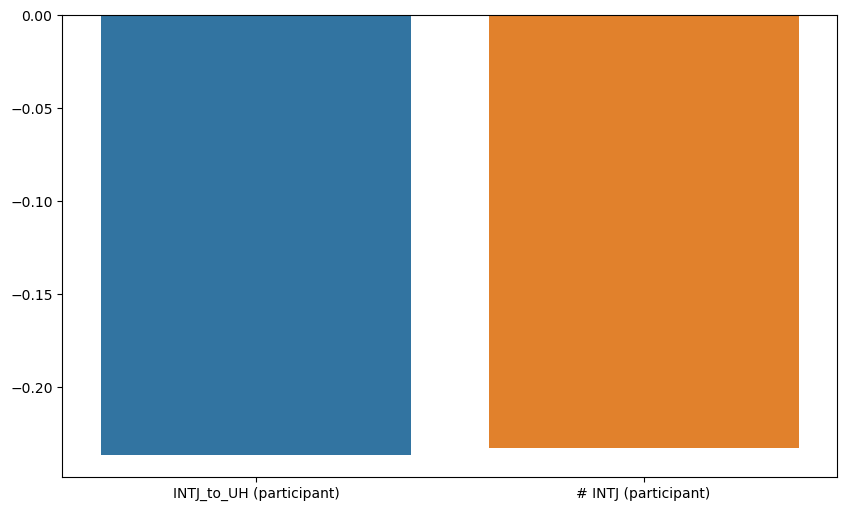

In [6]:
pvalues_low = pvalues_low.sort_values().drop('Age')
plt.figure(figsize=(10,6))
sns.barplot(y=corr[pvalues_low.index.to_list()].values, x=corr[pvalues_low.index.to_list()].index)
#plt.xticks(rotation=90)
plt.show()

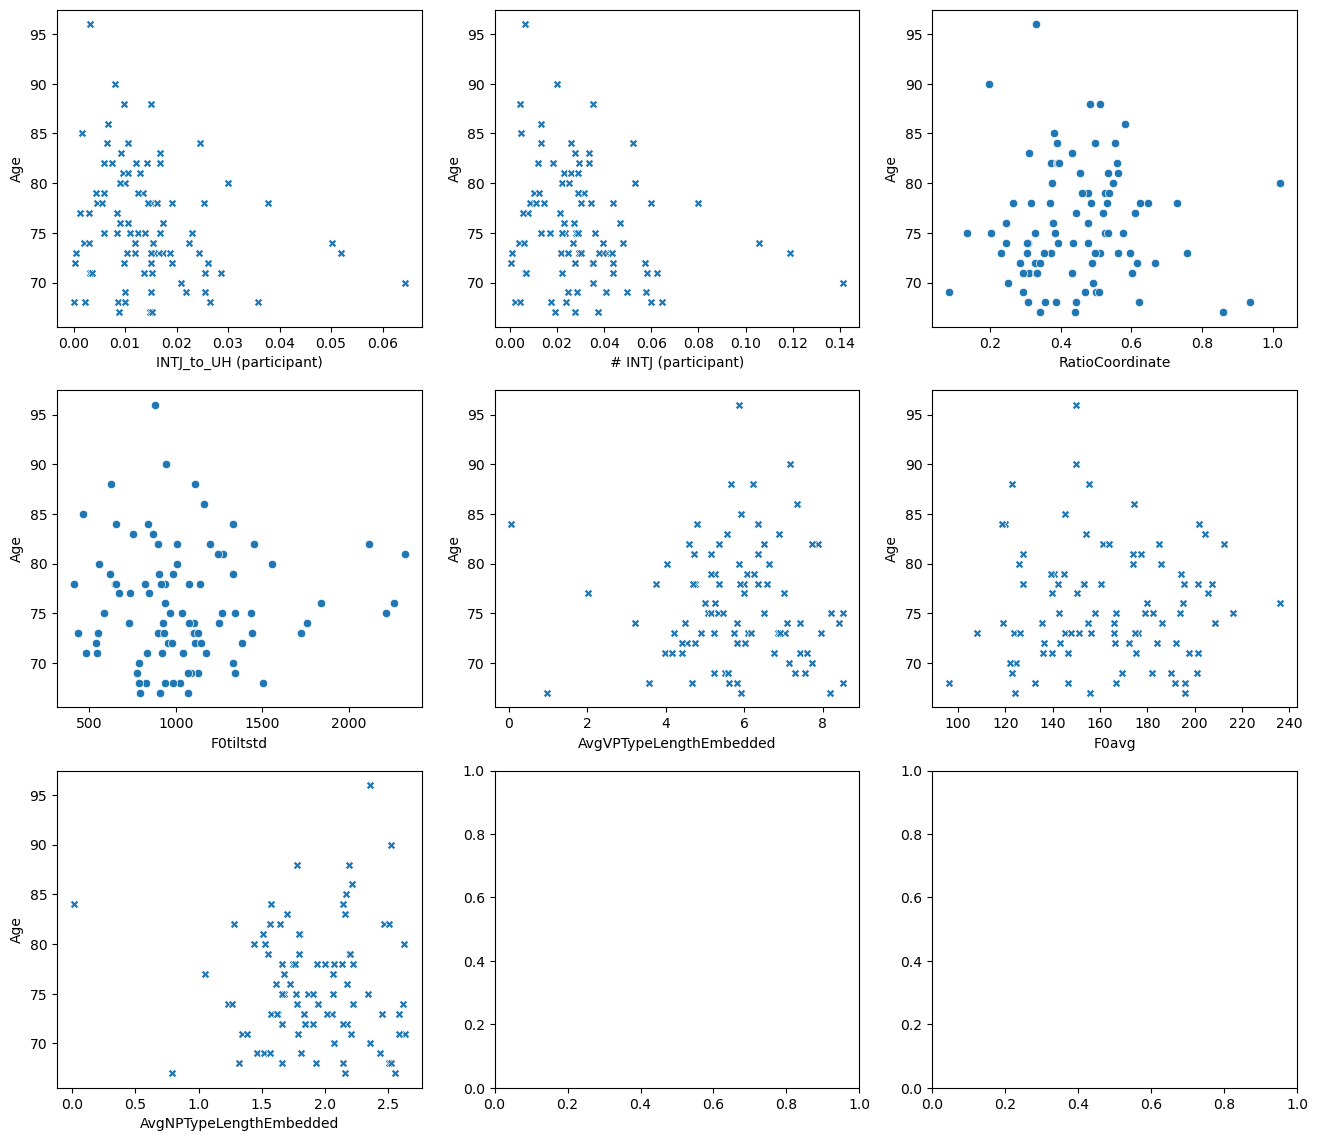

In [7]:
ROW, COL = 3, 3
fig, ax = plt.subplots(ROW,COL,figsize=(16,14))
cols = pvalues.index.to_list()
for row in range(ROW):
    for col in range(COL):
        if row*ROW + col < len(cols):
            sns.scatterplot(data=df, x=cols[row*ROW + col], y='Age',ax=ax[row][col], marker=('X' if corr[cols[row*ROW + col]]<0 else 'o'))

### p >= 0.9 & p <= 0.1

In [8]:
corr = CORR['Age'].drop('Age')
pvalues_high = PVALUES[np.abs(PVALUES['Age']) >= 0.9]['Age']
pvalues_low = PVALUES[np.abs(PVALUES['Age']) <= 0.1]['Age']
pvalues = pvalues_high.append(pvalues_low).drop('Age').sort_values()

C:\Users\edsto\AppData\Local\Temp\ipykernel_74928\3675007404.py:4: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pvalues = pvalues_high.append(pvalues_low).drop('Age').sort_values()


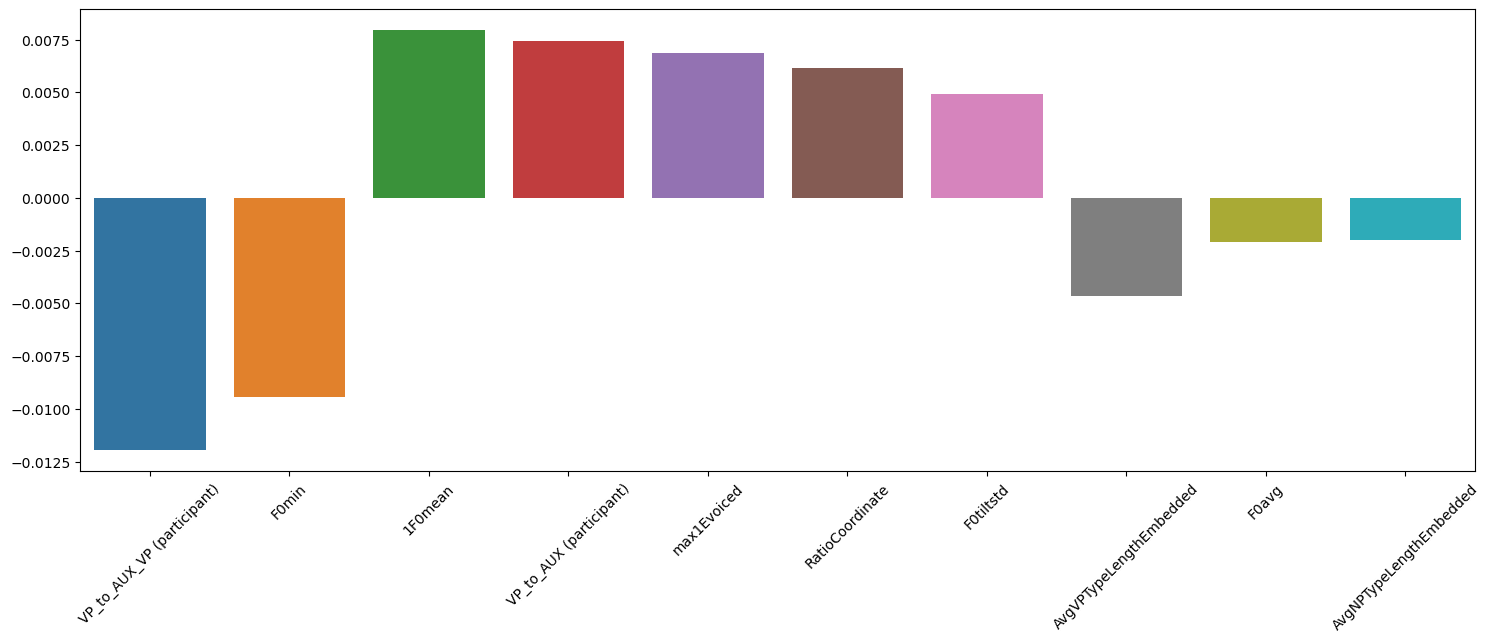

In [9]:
pvalues_high = pvalues_high.sort_values()
plt.figure(figsize=(18,6))
sns.barplot(y=corr[pvalues_high.index.to_list()].values, x=corr[pvalues_high.index.to_list()].index)
plt.xticks(rotation=45)
plt.show()

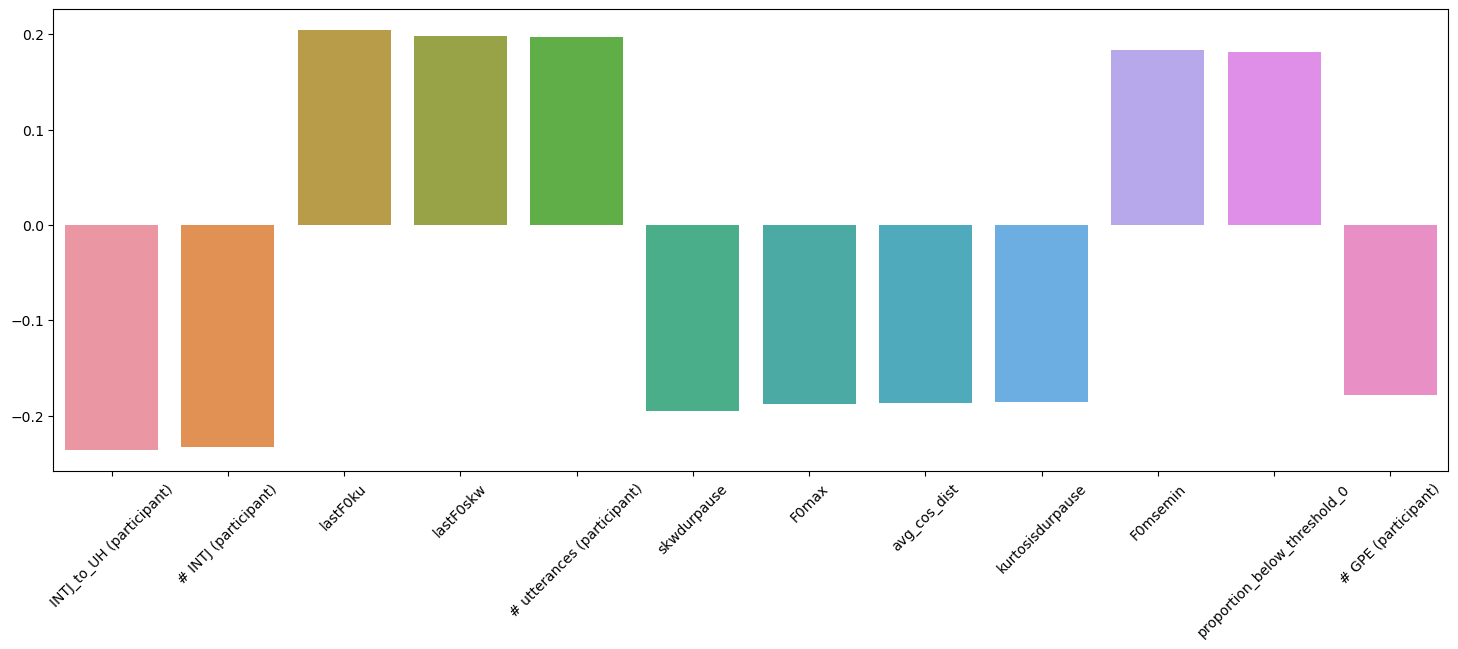

In [10]:
pvalues_low = pvalues_low.sort_values().drop('Age')
plt.figure(figsize=(18,6))
sns.barplot(y=corr[pvalues_low.index.to_list()].values, x=corr[pvalues_low.index.to_list()].index)
plt.xticks(rotation=45)
plt.show()

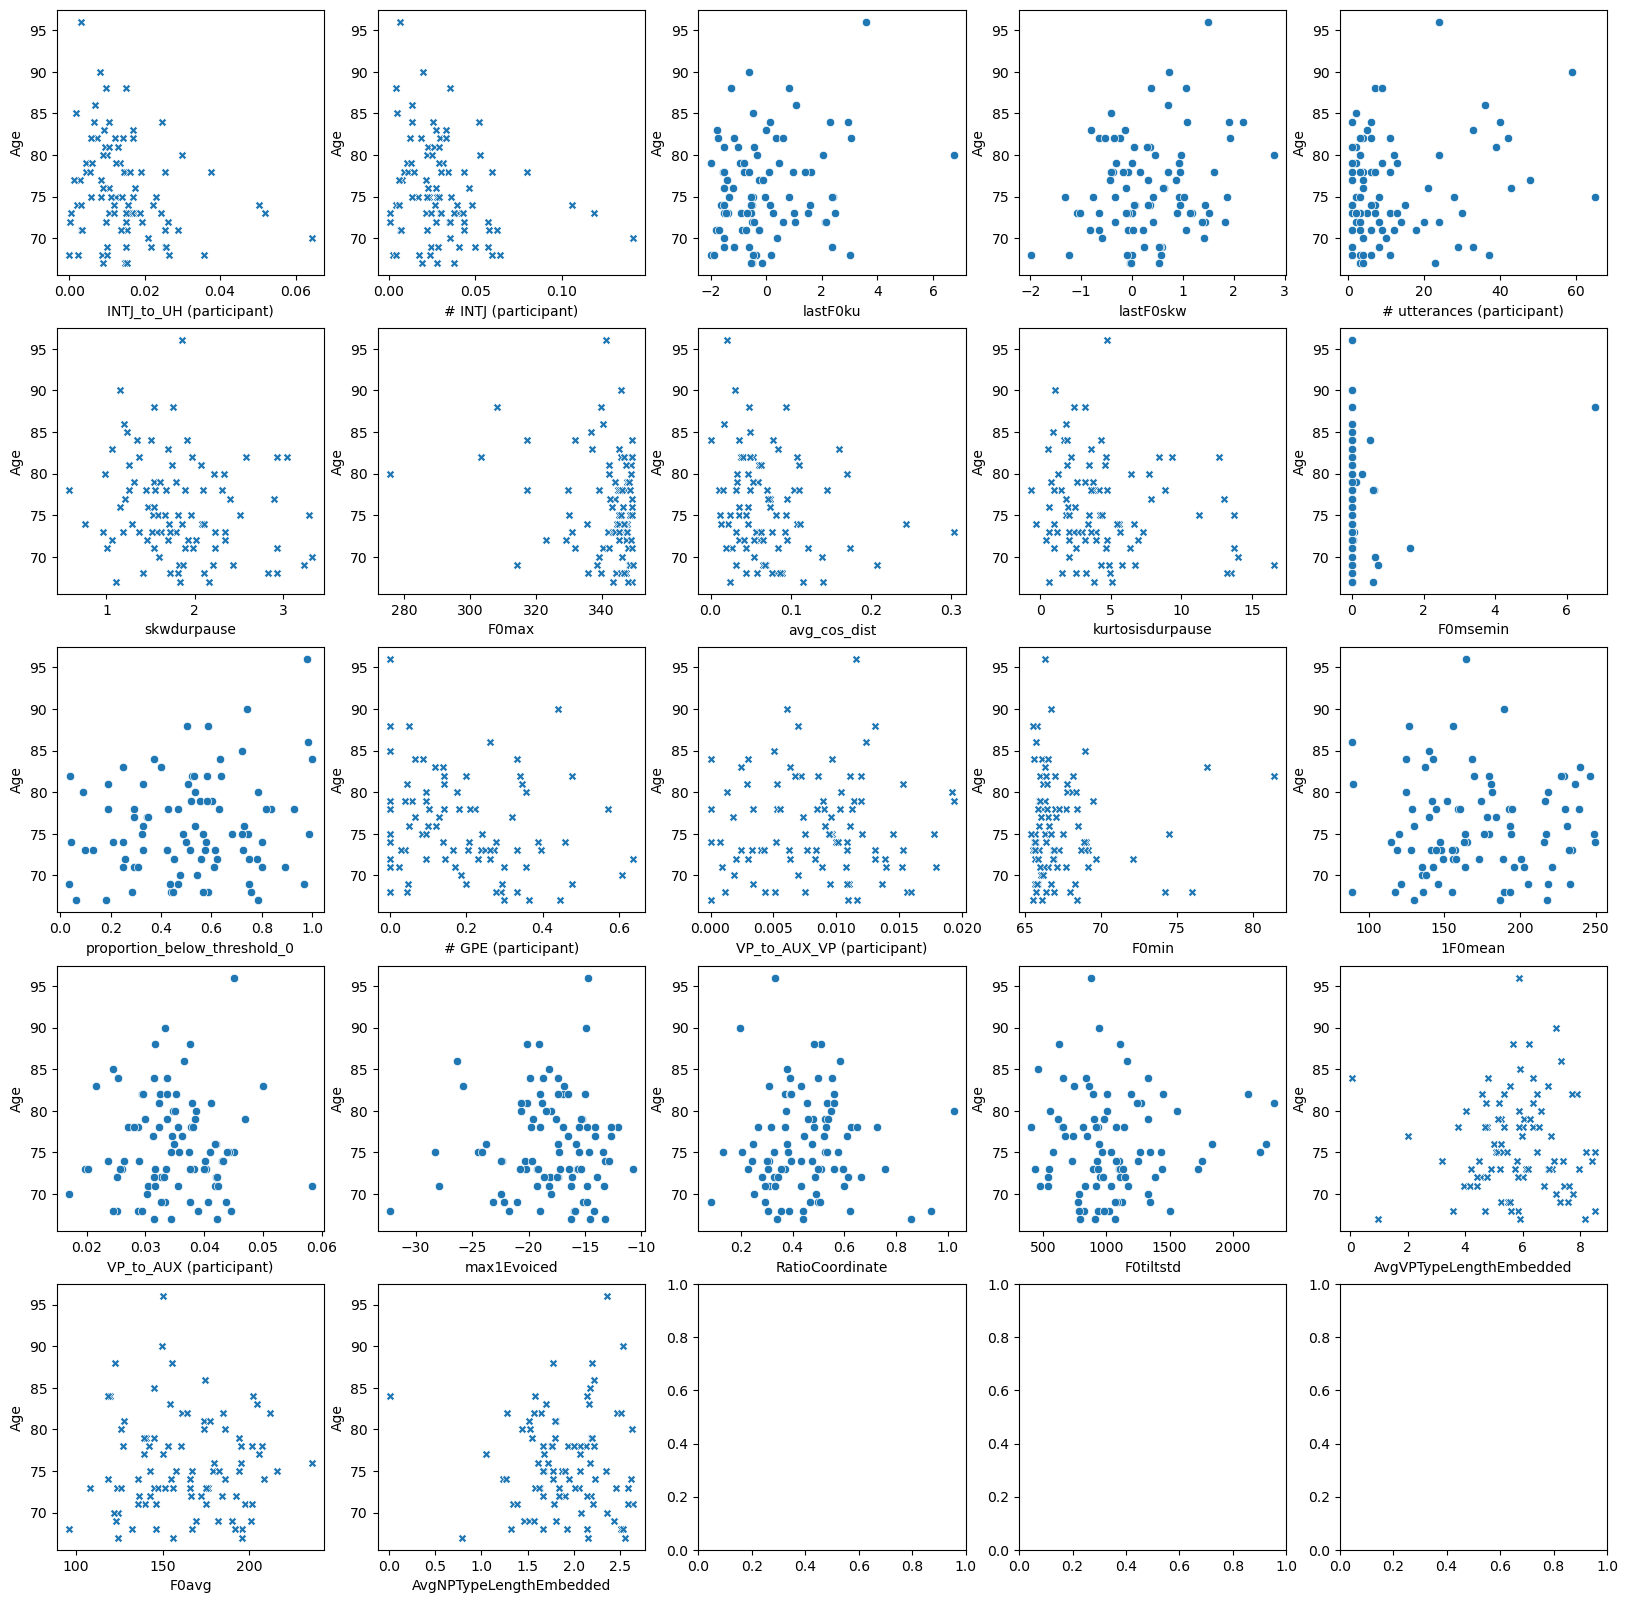

In [11]:
ROW, COL = 5, 5
fig, ax = plt.subplots(ROW,COL,figsize=(20,20))
cols = pvalues.index.to_list()
for row in range(ROW):
    for col in range(COL):
        if row*ROW + col < len(cols):
            sns.scatterplot(data=df, x=cols[row*ROW + col], y='Age',ax=ax[row][col], marker=('X' if corr[cols[row*ROW + col]]<0 else 'o'))

# General

In [12]:
base_high = BASE[BASE['Age'] >= 0.15]['Age'].sort_values()
base_low = BASE[BASE['Age'] <= -0.15]['Age'].sort_values()
base = base_high.append(base_low).drop('Age').sort_values()

C:\Users\edsto\AppData\Local\Temp\ipykernel_74928\1889210989.py:3: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  base = base_high.append(base_low).drop('Age').sort_values()


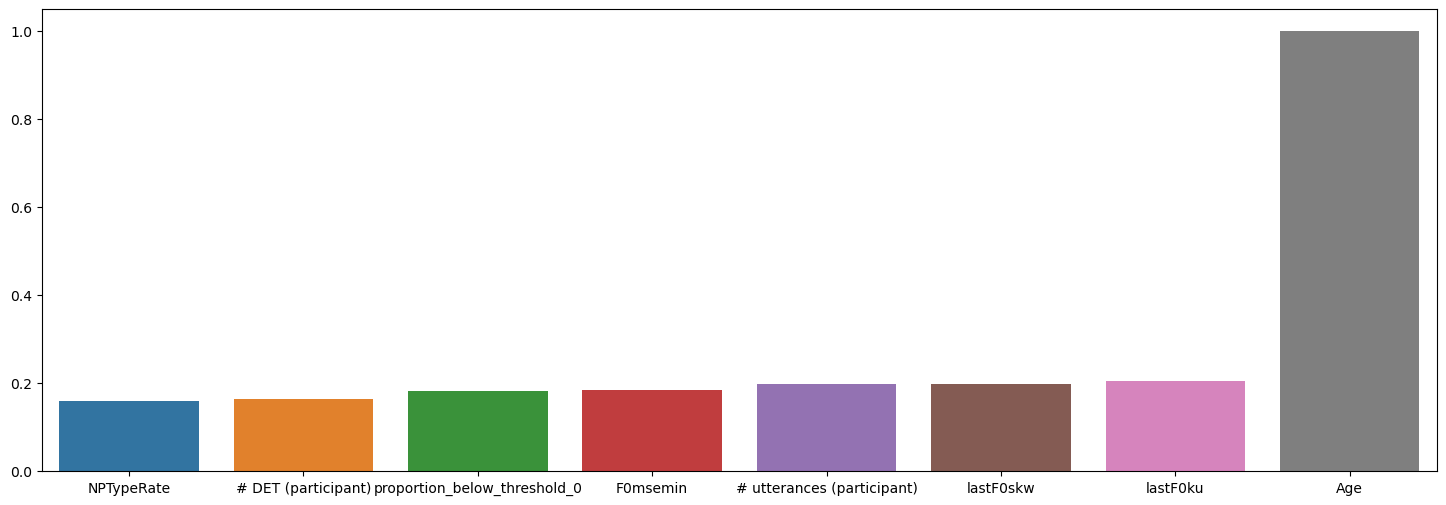

In [13]:
#base_high = base_high.sort_values().drop('Age')
plt.figure(figsize=(18,6))
sns.barplot(y=base_high.values, x=base_high.index)
#plt.xticks(rotation=90)
plt.show()

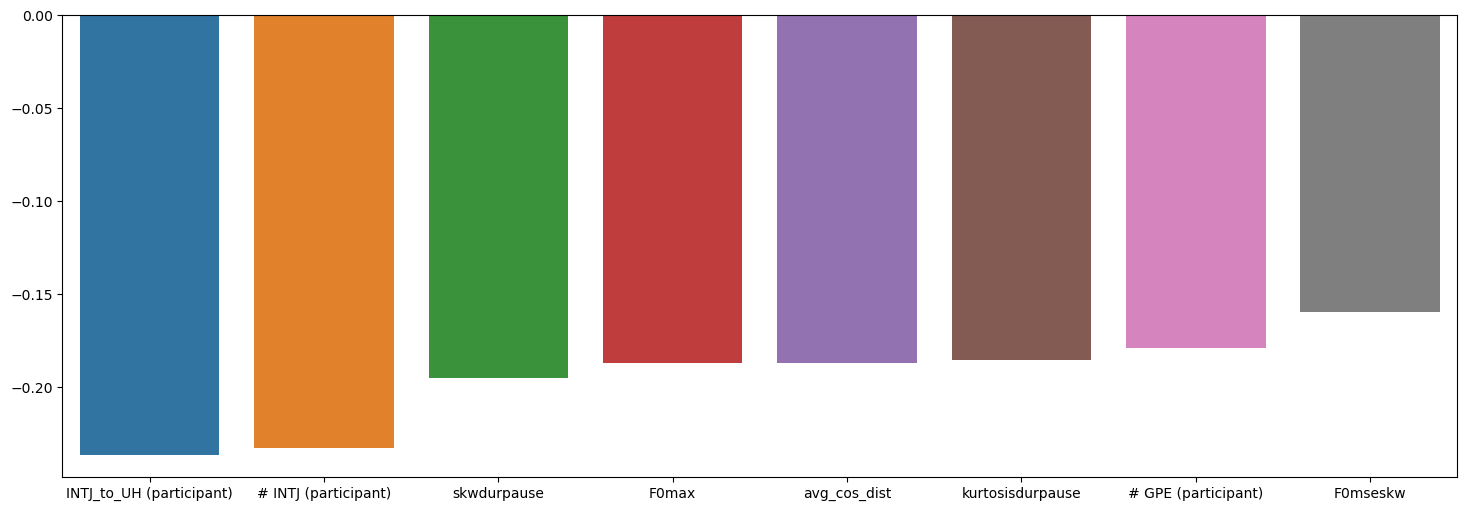

In [14]:
base_low = base_low.sort_values()
plt.figure(figsize=(18,6))
sns.barplot(y=base_low.values, x=base_low.index)
#plt.xticks(rotation=90)
plt.show()

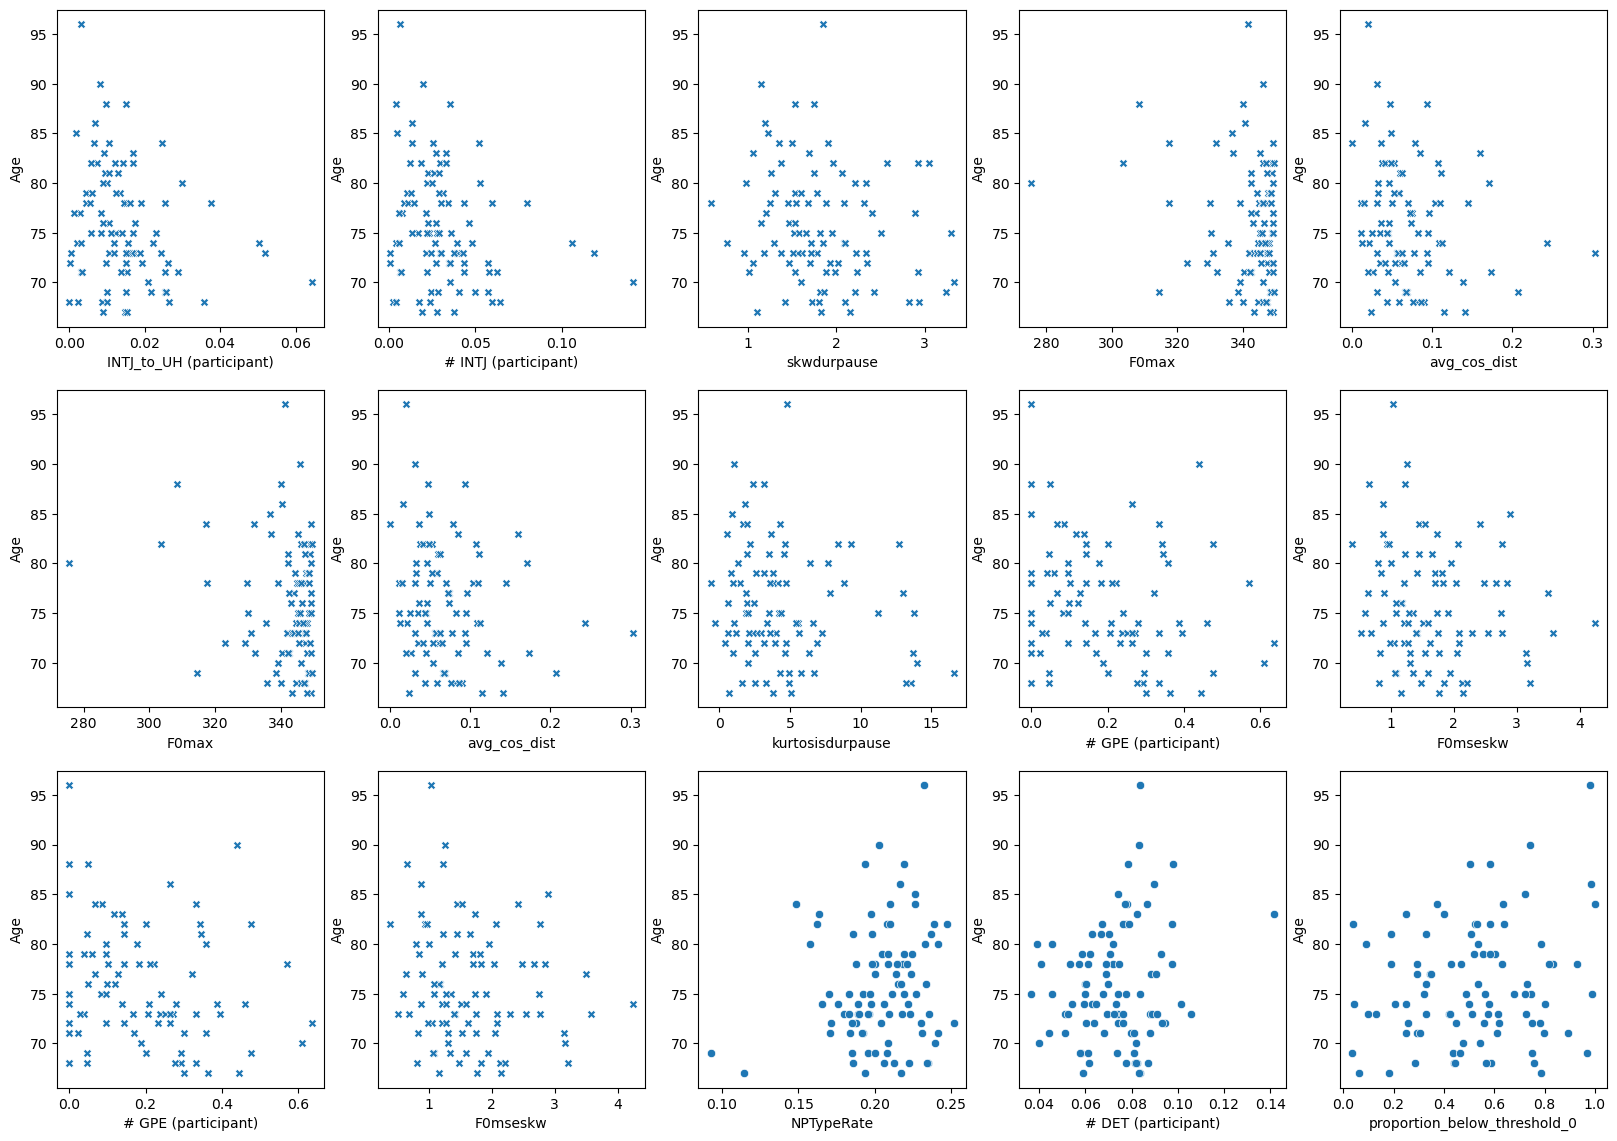

In [15]:
ROW, COL = 3, 5
fig, ax = plt.subplots(ROW,COL,figsize=(20,14))
cols = base.index.to_list()
for row in range(ROW):
    for col in range(COL):
        if row*ROW + col < len(cols):
            sns.scatterplot(data=df, x=cols[row*ROW + col], y='Age',ax=ax[row][col], marker=('X' if corr[cols[row*ROW + col]]<0 else 'o'))